# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [1]:
print("The dataset represents multiple marketing campaigns conducted between May 2008 and November 2010. T" \
"here were 17 different campaigns carried out over this period.")

The dataset represents multiple marketing campaigns conducted between May 2008 and November 2010. There were 17 different campaigns carried out over this period.


### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [2]:
import pandas as pd
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DTC 
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.model_selection import GridSearchCV 
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
print("The goal of this project is to build a model that can predict which customers are most likely to open a term deposit account. By analyzing past marketing campaign data, the bank can use this model to focus its outreach on individuals who are more inclined to respond positively, leading to better resource allocation and more effective marketing. This also helps reduce unnecessary calls to uninterested clients, saving time and effort. In addition, the model can highlight important patterns and factors that influence a customer’s decision-making process, helping the bank refine its approach and improve future campaign outcomes.")

The goal of this project is to build a model that can predict which customers are most likely to open a term deposit account. By analyzing past marketing campaign data, the bank can use this model to focus its outreach on individuals who are more inclined to respond positively, leading to better resource allocation and more effective marketing. This also helps reduce unnecessary calls to uninterested clients, saving time and effort. In addition, the model can highlight important patterns and factors that influence a customer’s decision-making process, helping the bank refine its approach and improve future campaign outcomes.


### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [7]:
from sklearn.preprocessing import LabelEncoder

# Copy the original DataFrame
data = df.copy()

# Drop duration for realistic modeling
data = data.drop(columns=['duration'])

# Encode target
data['y'] = data['y'].map({'no': 0, 'yes': 1})

# One-hot encode categorical features
data = pd.get_dummies(data, drop_first=True)

X = data.drop('y', axis=1)
y = data['y']


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [9]:
baseline_accuracy = (y_train == 0).mean()
print(f"Baseline Accuracy (predict all 'no'): {baseline_accuracy:.4f}")


Baseline Accuracy (predict all 'no'): 0.8873


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time

start = time.time()
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
end = time.time()

train_acc = accuracy_score(y_train, lr.predict(X_train))
test_acc = accuracy_score(y_test, lr.predict(X_test))

### Problem 9: Score the Model

What is the accuracy of your model?

In [11]:
print(f"Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}, Time: {end-start:.2f}s")



Train Accuracy: 0.9002, Test Accuracy: 0.9006, Time: 4.05s


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import time

results = []

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC()
}

for name, model in models.items():
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()
    
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    
    results.append({
        'Model': name,
        'Train Time': round(end - start, 2),
        'Train Accuracy': round(train_acc, 4),
        'Test Accuracy': round(test_acc, 4)
    })

results_df = pd.DataFrame(results)
print(results_df)


                 Model  Train Time  Train Accuracy  Test Accuracy
0  Logistic Regression        4.12          0.9002         0.9006
1                  KNN        0.02          0.9122         0.8939
2        Decision Tree        0.13          0.9954         0.8409
3                  SVM        6.59          0.8975         0.8977


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [13]:
print("If a gender feature were included in the dataset, we would need to carefully consider both its ethical implications and its impact on model performance. From a predictive standpoint, it is possible that gender may correlate with subscription behavior due to underlying social or economic patterns. However, using gender as a feature raises serious ethical concerns. Including such a feature could introduce or reinforce biases, leading to discriminatory outcomes, especially if the model is used to make real-world marketing decisions. For example, if the model learned to favor one gender over another, it could unfairly exclude certain groups from being offered financial products.")

If a gender feature were included in the dataset, we would need to carefully consider both its ethical implications and its impact on model performance. From a predictive standpoint, it is possible that gender may correlate with subscription behavior due to underlying social or economic patterns. However, using gender as a feature raises serious ethical concerns. Including such a feature could introduce or reinforce biases, leading to discriminatory outcomes, especially if the model is used to make real-world marketing decisions. For example, if the model learned to favor one gender over another, it could unfairly exclude certain groups from being offered financial products.


In [14]:
print("To improve model performance, hyperparameter tuning is a critical step. Each machine learning model includes parameters that are not learned from the data but instead set prior to training, which can significantly affect accuracy and generalization. For example, in K-Nearest Neighbors (KNN), the number of neighbors (n_neighbors) can influence whether the model overfits or underfits. Similarly, for Decision Trees, parameters such as max_depth, min_samples_split, and min_samples_leaf control the tree’s complexity and prevent overfitting. Instead of choosing these values manually, we can use techniques like Grid Search or Randomized Search with cross-validation to systematically explore combinations of hyperparameter values and identify those that yield the best results.")

To improve model performance, hyperparameter tuning is a critical step. Each machine learning model includes parameters that are not learned from the data but instead set prior to training, which can significantly affect accuracy and generalization. For example, in K-Nearest Neighbors (KNN), the number of neighbors (n_neighbors) can influence whether the model overfits or underfits. Similarly, for Decision Trees, parameters such as max_depth, min_samples_split, and min_samples_leaf control the tree’s complexity and prevent overfitting. Instead of choosing these values manually, we can use techniques like Grid Search or Randomized Search with cross-validation to systematically explore combinations of hyperparameter values and identify those that yield the best results.


In [15]:
print("Additionally, accuracy alone may not be the most appropriate metric—especially in imbalanced datasets like this one, where far more clients do not subscribe to the term deposit than those who do. In such cases, alternative metrics like precision, recall, F1-score, or ROC-AUC provide a more balanced evaluation. For instance, if the business goal is to correctly identify subscribers, recall becomes more important, as it measures how many of the actual positive cases the model is capturing. Adjusting these metrics ensures that the model aligns more closely with the business objective and performs well under real-world conditions.")

Additionally, accuracy alone may not be the most appropriate metric—especially in imbalanced datasets like this one, where far more clients do not subscribe to the term deposit than those who do. In such cases, alternative metrics like precision, recall, F1-score, or ROC-AUC provide a more balanced evaluation. For instance, if the business goal is to correctly identify subscribers, recall becomes more important, as it measures how many of the actual positive cases the model is capturing. Adjusting these metrics ensures that the model aligns more closely with the business objective and performs well under real-world conditions.


##### Questions

Does scaling have an effect on the models?

Does increasing the number of features have an effect on the accuracy of the model?

In [16]:
log = LogisticRegression()
svm = SVC()
knn = KNC()
dtc = DTC()

testing = [log, knn, svm, dtc]

results_array = []
#Test models
for model in testing:
  pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', model)
  ])
  pipeline.fit(X_train, y_train)

  predictions = pipeline.predict(X_test)
  accuracy = accuracy_score(predictions, y_test)
  print(f'{model} accuracy: {accuracy}')
  results_array.append(accuracy)
  

LogisticRegression() accuracy: 0.9011896091284293
KNeighborsClassifier() accuracy: 0.8956057295460063
SVC() accuracy: 0.9002184996358339
DecisionTreeClassifier() accuracy: 0.8402524884680748


LogisticRegression accuracy with scaling: 0.9011896091284293
KNeighborsClassifier accuracy with scaling: 0.8956057295460063
SVC accuracy with scaling: 0.9002184996358339
DecisionTreeClassifier accuracy with scaling: 0.8396455450352027
                 Model  Train Time  Train Accuracy  Test Accuracy  \
0  Logistic Regression        4.12          0.9002         0.9006   
1                  KNN        0.02          0.9122         0.8939   
2        Decision Tree        0.13          0.9954         0.8409   
3                  SVM        6.59          0.8975         0.8977   

   Scaling Accuracy  
0            0.9012  
1            0.8956  
2            0.9002  
3            0.8396  


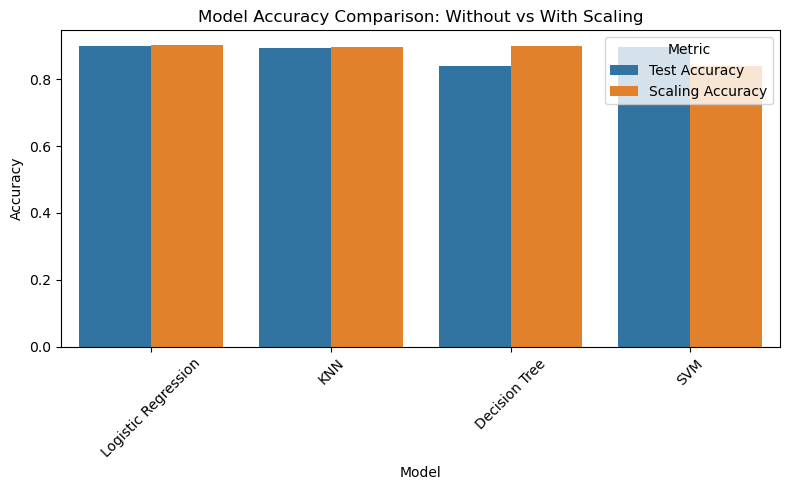

In [21]:
testing = [
    LogisticRegression(max_iter=1000),
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier()
]

results_array = []
for model in testing:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f'{model.__class__.__name__} accuracy with scaling: {accuracy}')
    results_array.append(round(accuracy, 4))

# Step 3: Add Scaling Accuracy column to results DataFrame
results_df['Scaling Accuracy'] = results_array

print(results_df)

# Step 4: Melt DataFrame and plot
results_barplot_format = results_df.melt(
    id_vars='Model', 
    value_vars=['Test Accuracy', 'Scaling Accuracy'], 
    var_name='Metric', 
    value_name='Accuracy'
)

plt.figure(figsize=(8,5))
plot = sns.barplot(x='Model', y='Accuracy', hue='Metric', data=results_barplot_format)
plot.set_title('Model Accuracy Comparison: Without vs With Scaling')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
bank_df_full = df.copy()
bank_df_full = pd.get_dummies(bank_df_full, columns=['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'poutcome'], drop_first=True)
bank_df_full['y'] = bank_df_full['y'].map({'yes': 1, 'no': 0})
bank_df_full['housing'] = bank_df_full['housing'].map({'yes': 1, 'no': 0})
bank_df_full['default'] = bank_df_full['default'].map({'yes': 1, 'no': 0})
bank_df_full['loan'] = bank_df_full['loan'].map({'yes': 1, 'no': 0})
bank_df_full.dropna(inplace=True)
bank_df_full.head()

#train test split
X = bank_df_full.drop('y', axis=1)
y = bank_df_full['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Loop through features and test models
by_model_results = []
for model in testing:
  results_array = []
  for i in range(1 , bank_df_full.shape[1] - 1):
    pipeline = Pipeline([
      ('scaler', StandardScaler()),
      ('model', model)
    ])
    pipeline.fit(X_train.iloc[ : , 0:i], y_train)

    predictions = pipeline.predict(X_test.iloc[ : , 0:i])
    accuracy = accuracy_score(predictions, y_test)
    results_array.append(accuracy)
  by_model_results.append(results_array)

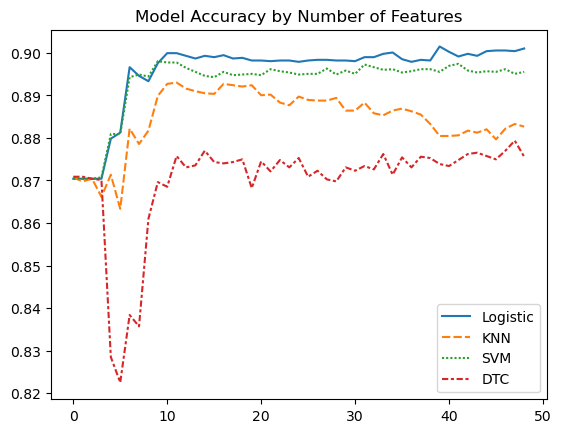

In [23]:
by_model_results_df = pd.DataFrame(by_model_results)
by_model_results_df = by_model_results_df.transpose()
by_model_results_df.rename(columns={0: 'Logistic', 1: 'KNN', 2:'SVM', 3:'DTC'}, inplace=True)
plot = sns.lineplot(data=by_model_results_df)
plot = plot.set_title('Model Accuracy by Number of Features')